<a href="https://colab.research.google.com/github/dbtjr1103/Basic_practice/blob/main/tofind_Food_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food img Downloads

In [1]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# 캐글 설치
!pip install -q kaggle

In [3]:
# .kaggle 폴더 생성
!mkdir -p ~/.kaggle/
# kaggle.josn .kaggle로 복사
!cp kaggle.json ~/.kaggle/
# 해당 폴더 목록 확인(복사 잘 되었는지 확인)
!ls ~/.kaggle

kaggle.json


In [4]:
cd ~

/root


In [5]:
!ls -a

.   .bashrc  .config   .jupyter  .keras  .npm	   .tmux.conf
..  .cache   .ipython  .kaggle	 .local  .profile  .wget-hsts


In [6]:
!ls .kaggle -al

total 16
drwxr-xr-x 2 root root 4096 Nov 26 06:39 .
drwx------ 1 root root 4096 Nov 26 06:39 ..
-rw-r--r-- 1 root root   66 Nov 26 06:39 kaggle.json


In [7]:
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!ls .kaggle -al

total 16
drwxr-xr-x 2 root root 4096 Nov 26 06:39 .
drwx------ 1 root root 4096 Nov 26 06:39 ..
-rw------- 1 root root   66 Nov 26 06:39 kaggle.json


In [9]:
cd /content

/content


In [10]:
!kaggle datasets download -d kmader/food41

100% 5.30G/5.30G [04:15<00:00, 25.2MB/s]
100% 5.30G/5.30G [04:15<00:00, 22.3MB/s]


In [11]:
!unzip -q food41.zip

In [2]:
import splitfolders

import os

import cv2
import numpy as np
from tqdm.notebook import tqdm

from matplotlib import pyplot as plt
import matplotlib.cm as cm

import tensorflow as tf

import pickle

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from tensorflow.keras import datasets, layers, models

from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.keras import Input
from tensorflow.keras.layers import Dropout, BatchNormalization

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [3]:
folder_path = '/content/images'
label_names = os.listdir(folder_path)
print(len(label_names))
print(label_names[:5])

101
['steak', 'lasagna', 'pad_thai', 'baklava', 'huevos_rancheros']


In [4]:
dataset = {}

# 이미지와 라벨 리스트에 담기
for label in label_names:
    sub_path = folder_path+'/'+label+'/'
    dataset[label] = []
    for filename in os.listdir(sub_path):
        dataset[label].append(sub_path+filename)

len(dataset)

101

In [5]:
# resize 덮어씌우기
for label, filenames in tqdm(dataset.items()):
    for filename in filenames:
        img = cv2.imread(filename)

        # 이미지의 x, y가 128이 넘을 경우 작게해주기
        percent = 1
        if(img.shape[1] > img.shape[0]) :       # 이미지의 가로가 세보다 크면 가로를 128으로 맞추고 세로를 비율에 맞춰서
            percent = 112/img.shape[1]
        else :
            percent = 112/img.shape[0]

        img = cv2.resize(img, dsize=(0, 0), fx=percent, fy=percent, interpolation=cv2.INTER_LINEAR)
                # 이미지 범위 지정
        y,x,h,w = (0,0,img.shape[0], img.shape[1])

        # 그림 주변에 검은색으로 칠하기
        w_x = (112-(w-x))/2  # w_x = (128 - 그림)을 뺀 나머지 영역 크기 [ 그림나머지/2 [그림] 그림나머지/2 ]
        h_y = (112-(h-y))/2

        if(w_x < 0):         # 크기가 -면 0으로 지정.
            w_x = 0
        elif(h_y < 0):
            h_y = 0

        M = np.float32([[1,0,w_x], [0,1,h_y]])  #(2*3 이차원 행렬)
        img_re = cv2.warpAffine(img, M, (112, 112)) #이동변환  
       
        cv2.imwrite('/content/images/{0}/{1}'.format(label, filename.split("/")[-1]) , img_re)

  0%|          | 0/101 [00:00<?, ?it/s]

In [6]:
splitfolders.ratio('/content/images', output='/content/dataset', seed=77, ratio=(0.6, 0.2, 0.2))

Copying files: 101000 files [00:16, 6135.88 files/s]


In [7]:
label2index = {}
for idx, label in enumerate(label_names):
    label2index[label] = idx
label2index

{'steak': 0,
 'lasagna': 1,
 'pad_thai': 2,
 'baklava': 3,
 'huevos_rancheros': 4,
 'carrot_cake': 5,
 'spaghetti_carbonara': 6,
 'french_toast': 7,
 'fish_and_chips': 8,
 'nachos': 9,
 'onion_rings': 10,
 'shrimp_and_grits': 11,
 'waffles': 12,
 'gyoza': 13,
 'chicken_wings': 14,
 'beef_tartare': 15,
 'chocolate_mousse': 16,
 'foie_gras': 17,
 'samosa': 18,
 'lobster_bisque': 19,
 'beet_salad': 20,
 'red_velvet_cake': 21,
 'bruschetta': 22,
 'caesar_salad': 23,
 'hot_and_sour_soup': 24,
 'escargots': 25,
 'mussels': 26,
 'strawberry_shortcake': 27,
 'crab_cakes': 28,
 'pulled_pork_sandwich': 29,
 'deviled_eggs': 30,
 'dumplings': 31,
 'poutine': 32,
 'ice_cream': 33,
 'french_onion_soup': 34,
 'spring_rolls': 35,
 'grilled_cheese_sandwich': 36,
 'pho': 37,
 'cup_cakes': 38,
 'seaweed_salad': 39,
 'filet_mignon': 40,
 'ceviche': 41,
 'peking_duck': 42,
 'grilled_salmon': 43,
 'tacos': 44,
 'cheesecake': 45,
 'paella': 46,
 'macarons': 47,
 'chicken_quesadilla': 48,
 'pizza': 49,
 'tuna

In [8]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)

In [9]:
folder_path = '/content/dataset/train'

for label in  tqdm(os.listdir(folder_path)):
    label_path = folder_path + '/' + label + '/'
    for filename in os.listdir(label_path): 
        filepath = label_path + filename

        img = load_img(filepath)
        # img 출력
        # plt.imshow(img)
        # break
        x = img_to_array(img)
        # x.shape 출력
        # print(x.shape)
        # break
        x = x.reshape((1,) + x.shape)

        i = 0
        # flow : augmentation 함수
        for batch in datagen.flow(x, batch_size=1,
                                save_to_dir=label_path, save_prefix=label, save_format='jpg'):
            i += 1
            if i > 1:
                break  

  0%|          | 0/101 [00:00<?, ?it/s]

In [10]:
folder_path = '/content/dataset/train'
dataset = {}

# 이미지와 라벨 리스트에 담기
for label in os.listdir(folder_path):
    sub_path = folder_path+'/'+label+'/'
    dataset[label] = []
    for filename in os.listdir(sub_path):
        dataset[label].append(sub_path+filename)

In [ ]:
x_train, y_train = [], []

for label, filenames in tqdm(dataset.items()):
    for filename in filenames:
        image = cv2.imread(filename) # img를 array 형태로 변경

        x_train.append(image)
        y_train.append(label2index[label]) # label을 index로 변경

  0%|          | 0/101 [00:00<?, ?it/s]

In [15]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
x_train.dtype

dtype('O')

In [18]:
x_train = x_train.astype('int8')

ValueError: ignored

In [ ]:
x_train.shape, y_train.shape

In [ ]:
folder_path = '/content/dataset/val'
dataset = {}

# 이미지와 라벨 리스트에 담기
for label in os.listdir(folder_path):
    sub_path = folder_path+'/'+label+'/'
    dataset[label] = []
    for filename in os.listdir(sub_path):
        dataset[label].append(sub_path+filename)

In [ ]:
x_val, y_val = [], []

for label, filenames in dataset.items():
    for filename in filenames:
        image = cv2.imread(filename) # img를 array 형태로 변경

        x_val.append(image)
        y_val.append(label2index[label]) # label을 index로 변경

In [ ]:
x_val, y_val= np.array(x_val), np.array(y_val)

In [ ]:
x_val = x_val.astype('int8')

In [ ]:
x_val.shape, y_val.shape

In [ ]:
folder_path = '/content/dataset/test'
dataset = {}

# 이미지와 라벨 리스트에 담기
for label in os.listdir(folder_path):
    sub_path = folder_path+'/'+label+'/'
    dataset[label] = []
    for filename in os.listdir(sub_path):
        dataset[label].append(sub_path+filename)

In [ ]:
x_test, y_test = [], []

for label, filenames in dataset.items():
    for filename in filenames:
        image = cv2.imread(filename) # img를 array 형태로 변경

        x_test.append(image)
        y_test.append(label2index[label]) # label을 index로 변경

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
x_test = x_test.astype('int8')

In [ ]:
x_test.shape, y_test.shape

In [ ]:
def zero_mean(image):
    # zero-centering
    return np.mean(image, axis=0)

In [ ]:
zero_mean_img = zero_mean(x_train).astype('int8')

In [ ]:
x_train -= zero_mean_img
x_val -= zero_mean_img
x_test -= zero_mean_img

In [ ]:
x_train, x_val, x_test = x_train / 255.0, x_val / 255.0, x_test / 255.0

# model handling

In [45]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from tensorflow.keras import datasets, layers, models, Input
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.model_selection import train_test_split

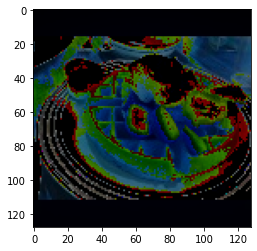

In [51]:
plt.figure()
plt.imshow(x_train[28234])
plt.show()

In [53]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((226950, 128, 128, 3),
 (226950,),
 (20200, 128, 128, 3),
 (20200,),
 (20200, 128, 128, 3),
 (20200,))

In [70]:
y_train = y_train.reshape((226950,1))
y_val = y_val.reshape((20200,1))
y_test = y_test.reshape((20200,1))

In [110]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [111]:
model = ResNet50(include_top=False, input_shape = (128, 128 ,3), weights = 'imagenet')
print(len(model.layers))

175


In [115]:
model.trainable = True
for layer in model.layers[:-20]: 
  layer.trainable = False				

inputs = tf.keras.Input(shape=(128, 128, 3))

x = model(inputs, training=False)

x = tf.keras.layers.Flatten(input_shape=model.output_shape[1:])(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x= tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(6, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 31,978,118
Trainable params: 17,321,734
Non-tra